In [184]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

LINK PARA O DATASET https://www.kaggle.com/datasets/psychewolf/dota-2-heroes-dataset?select=heroes_data.csv

importada as bibliotecas necessárias

<h3>Leitura do csv e visualização inicial</h3>

In [185]:
df = pd.read_csv('./data/heroes_data.csv',sep=',')
df.sample(2)

,Unnamed: 0,id,name,localized_name,primary_attr,attack_type,roles,img,icon,base_health,...,5_win,6_pick,6_win,7_pick,7_win,8_pick,8_win,winrate,lane,main_role
23,23,25,npc_dota_hero_lina,Lina,int,Ranged,"['Support', 'Carry', 'Nuker', 'Disabler']",/apps/dota2/images/heroes/lina_full.png?,/apps/dota2/images/heroes/lina_icon.png,200,...,14230,14003,6507,5513,2598,1244,571,46.899512,4,support
39,39,41,npc_dota_hero_faceless_void,Faceless Void,agi,Melee,"['Carry', 'Initiator', 'Disabler', 'Escape', '...",/apps/dota2/images/heroes/faceless_void_full.png?,/apps/dota2/images/heroes/faceless_void_icon.png,200,...,8503,6521,2911,1949,893,262,120,45.816373,1,safelane


In [186]:
df.columns

Index(['Unnamed: 0', 'id', 'name', 'localized_name', 'primary_attr',
       'attack_type', 'roles', 'img', 'icon', 'base_health',
       'base_health_regen', 'base_mana', 'base_mana_regen', 'base_armor',
       'base_mr', 'base_attack_min', 'base_attack_max', 'base_str', 'base_agi',
       'base_int', 'str_gain', 'agi_gain', 'int_gain', 'attack_range',
       'projectile_speed', 'attack_rate', 'move_speed', 'turn_rate',
       'cm_enabled', 'legs', 'hero_id', 'turbo_picks', 'turbo_wins', 'pro_ban',
       'pro_win', 'pro_pick', '1_pick', '1_win', '2_pick', '2_win', '3_pick',
       '3_win', '4_pick', '4_win', '5_pick', '5_win', '6_pick', '6_win',
       '7_pick', '7_win', '8_pick', '8_win', 'winrate', 'lane', 'main_role'],
      dtype='object')

In [187]:
df.columns
df = df[['localized_name','primary_attr','attack_type','base_health','base_mana', 'base_mana_regen', 'base_armor','base_attack_min', 'base_attack_max','base_str', 'base_agi','base_int', 'str_gain', 'agi_gain', 'int_gain', 'attack_range','move_speed','1_pick', '1_win', '2_pick', '2_win','3_pick','3_win', '4_pick', '4_win', '5_pick', '5_win', '6_pick', '6_win','7_pick', '7_win', '8_pick', '8_win', 'winrate','main_role']]
df.sample(3)

,localized_name,primary_attr,attack_type,base_health,base_mana,base_mana_regen,base_armor,base_attack_min,base_attack_max,base_str,...,5_pick,5_win,6_pick,6_win,7_pick,7_win,8_pick,8_win,winrate,main_role
11,Phantom Lancer,agi,Melee,200,75,0.0,0.0,26,40,19,...,19625,9828,10065,5050,5627,2849,2269,1152,50.671226,safelane
45,Viper,agi,Ranged,200,75,0.0,-2.0,27,29,21,...,19434,9374,7894,3805,3104,1475,848,385,47.064777,mid
48,Dazzle,int,Ranged,200,75,0.0,-1.0,22,28,18,...,16476,7915,6072,2923,1853,912,279,132,48.968105,hard_support


<h3>Checando valores nulos ou NaN</h3>

<AxesSubplot: >

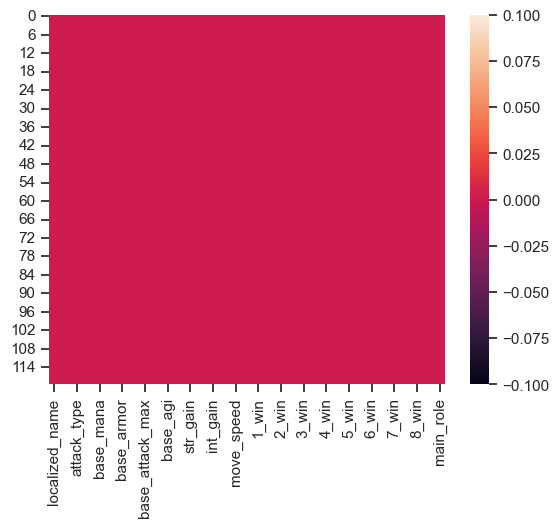

In [188]:
sns.heatmap(df.isna())

Não existem valores nulos ou NaN no data frame

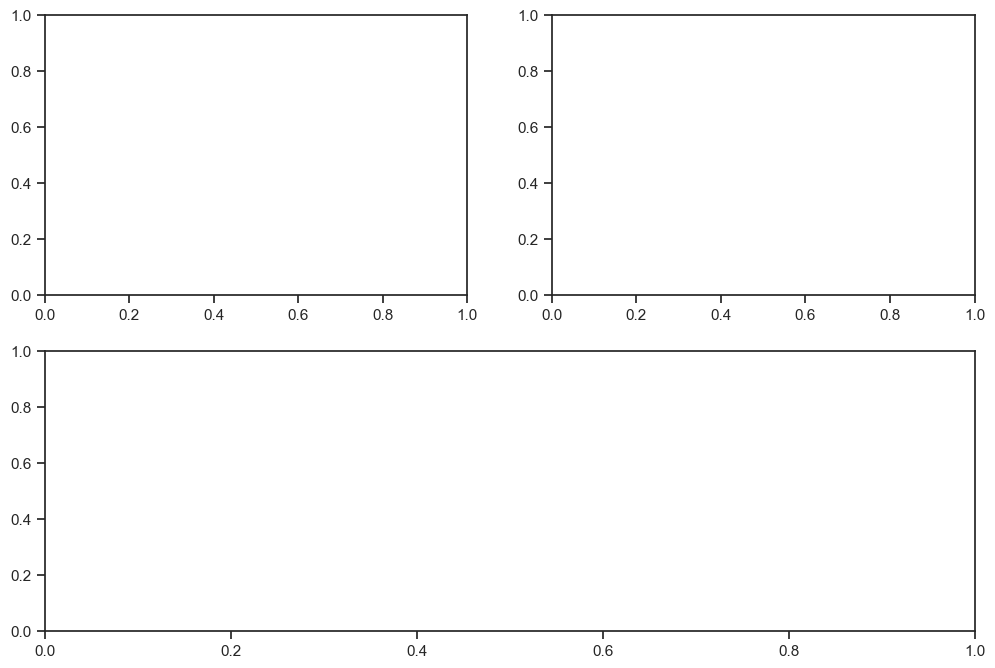

In [189]:
area = plt.figure(figsize=(12,8))
fig1 = area.add_subplot(2,2,1)
fig2 = area.add_subplot(2,2,2)
fig3 = area.add_subplot(2,2,(3,4))


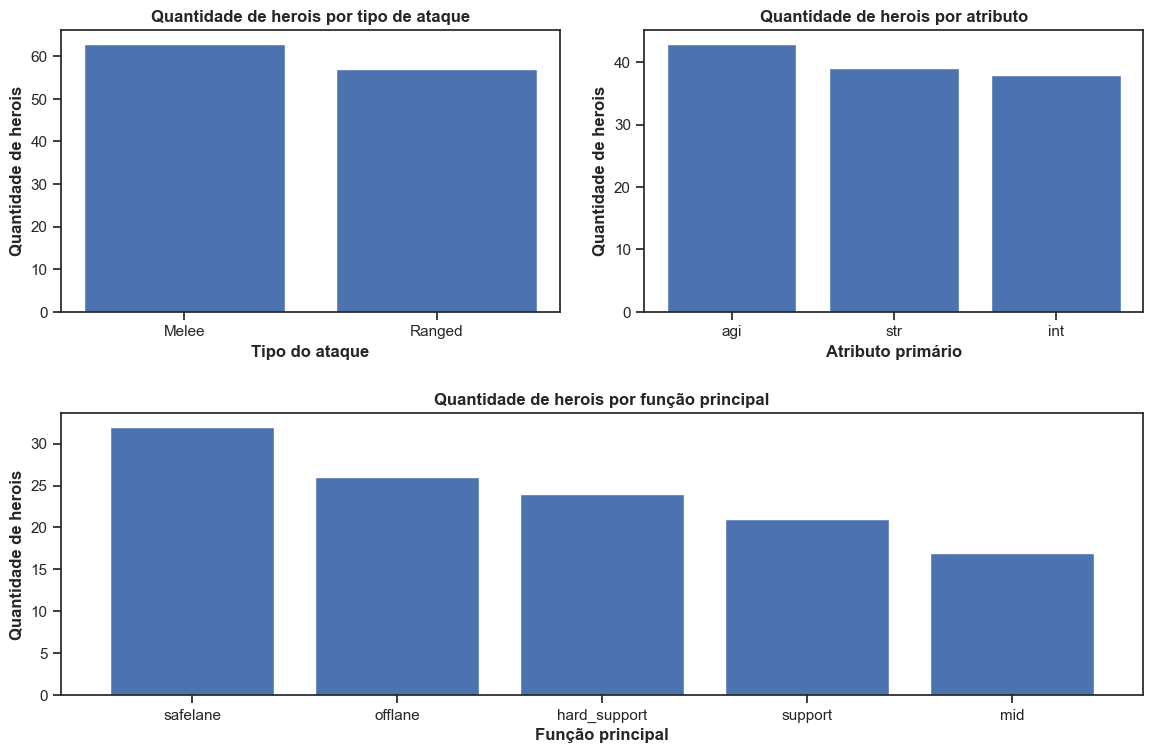

In [190]:
fig1.bar(data=df, x=df['attack_type'].unique(), height=df['attack_type'].value_counts())
fig1.set_title('Quantidade de herois por tipo de ataque',fontweight="bold")
fig1.set_ylabel('Quantidade de herois',fontweight="bold")
fig1.set_xlabel('Tipo do ataque',fontweight="bold")

fig2.bar(data=df, x=df['primary_attr'].unique(), height=df['primary_attr'].value_counts())
fig2.set_title('Quantidade de herois por atributo',fontweight="bold")
fig2.set_ylabel('Quantidade de herois',fontweight="bold")
fig2.set_xlabel('Atributo primário',fontweight="bold")

fig3.bar(data=df, x=df['main_role'].unique(), height=df['main_role'].value_counts())
fig3.set_title('Quantidade de herois por função principal',fontweight="bold")
fig3.set_ylabel('Quantidade de herois',fontweight="bold")
fig3.set_xlabel('Função principal',fontweight="bold")
area.tight_layout(pad=2.0)

area





<ul>
    <li>Nota-se uma predominância de herois Melees no jogo</li>
    <li>Nota-se uma predominância de herois possuindo agilidade como seu atributo principal no jogo</li>
    <li>Safelane sendo a função principal mais realizada pelos herois e o Mid sendo a que possuem menos herois que façam bem essa função</li>
</ul>

In [191]:
first_pick = df[df['1_pick'] == df['1_pick'].max()]['localized_name'].values
second_pick = df[df['2_pick'] == df['2_pick'].max()]['localized_name'].values
third_pick = df[df['3_pick'] == df['3_pick'].max()]['localized_name'].values
fourth_pick = df[df['4_pick'] == df['4_pick'].max()]['localized_name'].values
fifth_pick = df[df['5_pick'] == df['5_pick'].max()]['localized_name'].values
sixth_pick = df[df['6_pick'] == df['6_pick'].max()]['localized_name'].values
seventh_pick = df[df['7_pick'] == df['7_pick'].max()]['localized_name'].values
eighth_pick = df[df['8_pick'] == df['8_pick'].max()]['localized_name'].values
list = [first_pick,second_pick,third_pick,fourth_pick,fifth_pick,sixth_pick,seventh_pick,eighth_pick]
for i in range(0,8):
    print(f'O heroi mais escolhido na {i+1} escolha é {list[i][0]}')


O heroi mais escolhido na 1 escolha é Sniper
O heroi mais escolhido na 2 escolha é Pudge
O heroi mais escolhido na 3 escolha é Pudge
O heroi mais escolhido na 4 escolha é Pudge
O heroi mais escolhido na 5 escolha é Pudge
O heroi mais escolhido na 6 escolha é Juggernaut
O heroi mais escolhido na 7 escolha é Juggernaut
O heroi mais escolhido na 8 escolha é Void Spirit


In [192]:
df.columns

Index(['localized_name', 'primary_attr', 'attack_type', 'base_health',
       'base_mana', 'base_mana_regen', 'base_armor', 'base_attack_min',
       'base_attack_max', 'base_str', 'base_agi', 'base_int', 'str_gain',
       'agi_gain', 'int_gain', 'attack_range', 'move_speed', '1_pick', '1_win',
       '2_pick', '2_win', '3_pick', '3_win', '4_pick', '4_win', '5_pick',
       '5_win', '6_pick', '6_win', '7_pick', '7_win', '8_pick', '8_win',
       'winrate', 'main_role'],
      dtype='object')

In [193]:
df_stats = df[['primary_attr','base_health','base_mana', 'base_mana_regen', 'base_armor', 'base_attack_min',
       'base_attack_max', 'base_str', 'base_agi', 'base_int', 'str_gain',
       'agi_gain', 'int_gain', 'attack_range', 'move_speed','attack_type']]
corr = df_stats.corr().iloc[2:,2:]
corr

C:\Users\Asus\AppData\Local\Temp\ipykernel_23692\1741920496.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_stats.corr().iloc[2:,2:]


,base_mana_regen,base_armor,base_attack_min,base_attack_max,base_str,base_agi,base_int,str_gain,agi_gain,int_gain,attack_range,move_speed
base_mana_regen,1.000000,0.035078,-0.023312,-0.048143,-0.176925,-0.119268,0.211429,-0.120275,-0.060690,0.212071,0.178485,-0.093825
base_armor,0.035078,1.000000,0.160252,0.129465,-0.015829,-0.075054,-0.009351,0.017652,0.048879,-0.104235,-0.288959,0.288396
base_attack_min,-0.023312,0.160252,1.000000,0.901469,0.239328,-0.254760,-0.283216,0.247829,-0.151789,-0.285169,-0.471705,-0.037512
base_attack_max,-0.048143,0.129465,0.901469,1.000000,0.209702,-0.288803,-0.198214,0.266800,-0.216543,-0.208316,-0.394171,-0.054764
base_str,-0.176925,-0.015829,0.239328,0.209702,1.000000,-0.317515,-0.115112,0.540538,-0.350574,-0.288821,-0.479830,-0.003106
base_agi,-0.119268,-0.075054,-0.254760,-0.288803,-0.317515,1.000000,-0.063175,-0.404380,0.659817,-0.098293,0.004906,0.145364
base_int,0.211429,-0.009351,-0.283216,-0.198214,-0.115112,-0.063175,1.000000,-0.194869,-0.192250,0.623221,0.436949,0.019970
str_gain,-0.120275,0.017652,0.247829,0.266800,0.540538,-0.404380,-0.194869,1.000000,-0.359609,-0.380693,-0.474264,0.017994
agi_gain,-0.060690,0.048879,-0.151789,-0.216543,-0.350574,0.659817,-0.192250,-0.359609,1.000000,-0.274888,-0.002032,-0.030226
int_gain,0.212071,-0.104235,-0.285169,-0.208316,-0.288821,-0.098293,0.623221,-0.380693,-0.274888,1.000000,0.671435,-0.157118


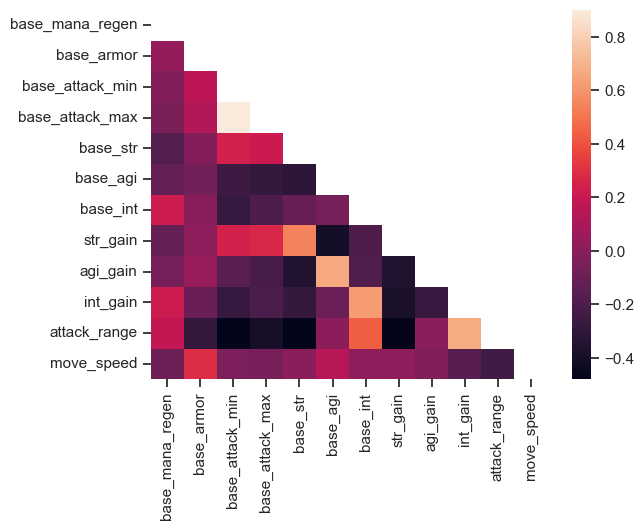

In [194]:
matrix = np.triu(corr)
sns.heatmap(corr,mask=matrix)
plt.show()

Existem algumas informações importantes nesse gráfico.
<ol>
<li>Percebe-se que quanto maior o atributo básico(provavelmente o atributo primário do heroi) maior o seu ganho ao longo do jogo</li>
<li>o ataque básico mínimo e o máximo tem uma grande correlação (0.901469), indicando que os 2 tendem a variar juntos, quanto maior o ataque máximo, maior o ataque mínimo, tendendo a seguir o mesmo delta(intervalo)</li>
<li>A mais curiosa é sem duvida a correlação relevante entre o atributo de inteligência e o 'attack range', uma das razões disso se da pela maioria dos herois de inteligência serem herois que atacam de 'ranged'</li>
<li>Contrariamente aos herois de inteligência, os herois de força em sua grande maioria são 'melees', fazendo assim com que esses possuam um 'attack range' menor</li>
</ol>
<h4>gráficos abaixo servem para fundamentar os tópicos 3 e 4</h4>

In [195]:
df['primary_attr'].unique()

array(['agi', 'str', 'int'], dtype=object)

<AxesSubplot: xlabel='primary_attr', ylabel='count'>

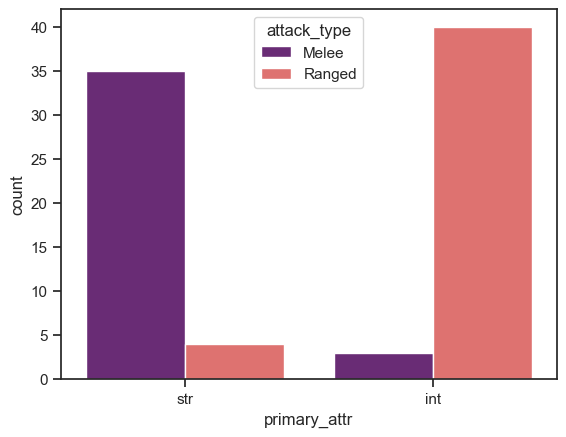

In [196]:
df_str_int = df[(df['primary_attr'] == 'str') | (df['primary_attr'] == 'int')]
sns.countplot(x = 'primary_attr', hue = 'attack_type', data = df_str_int, palette = 'magma')